Assignment 2

Packages:

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import module to view available datasets
import ISLP.data

# Import the main ISLP package
from ISLP import load_data

import statsmodels.formula.api as sm

1. In this exercise you will create some simulated data and will fit simple linear regression models to it. Make sure to use set.seed(1) prior to starting part (a) to ensure consistent results.rnorm
a.	Using the rnorm() function, create a vector, “x”, containing 100 observations drawn from a N(0,1) distribution. This represents a feature, X.


In [25]:
np.random.seed(1)
x = np.random.normal(0, 1, 100)
print(x)

[ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.3015387
  1.74481176 -0.7612069   0.3190391  -0.24937038  1.46210794 -2.06014071
 -0.3224172  -0.38405435  1.13376944 -1.09989127 -0.17242821 -0.87785842
  0.04221375  0.58281521 -1.10061918  1.14472371  0.90159072  0.50249434
  0.90085595 -0.68372786 -0.12289023 -0.93576943 -0.26788808  0.53035547
 -0.69166075 -0.39675353 -0.6871727  -0.84520564 -0.67124613 -0.0126646
 -1.11731035  0.2344157   1.65980218  0.74204416 -0.19183555 -0.88762896
 -0.74715829  1.6924546   0.05080775 -0.63699565  0.19091548  2.10025514
  0.12015895  0.61720311  0.30017032 -0.35224985 -1.1425182  -0.34934272
 -0.20889423  0.58662319  0.83898341  0.93110208  0.28558733  0.88514116
 -0.75439794  1.25286816  0.51292982 -0.29809284  0.48851815 -0.07557171
  1.13162939  1.51981682  2.18557541 -1.39649634 -1.44411381 -0.50446586
  0.16003707  0.87616892  0.31563495 -2.02220122 -0.30620401  0.82797464
  0.23009474  0.76201118 -0.22232814 -0.20075807  0.1

b.	Using the rnorm() function, create a vector, “eps”, containing 100 observations drawn from a N(0,0.25) distribution.

In [26]:
eps = np.random.normal(0, 0.25, 100)
print(eps)

[-0.11178214  0.30612693  0.10087291  0.14839463 -0.27372796  0.04234561
  0.18513911 -0.23842515 -0.06655463  0.00815364 -0.34327933  0.07878985
  0.21154016 -0.21487899  0.08763649 -0.32807085 -0.00967388 -0.40394309
  0.28035443  0.10222513 -0.00615424 -0.1937904   0.31843898  0.49177544
 -0.46449547  0.30904101  0.40691269  0.08450292 -0.29981701  0.21583633
 -0.04523008 -0.15098016 -0.30751453  0.13763437  0.19820172 -0.15588268
  0.13014408 -0.28608535  0.20046526  0.01164182 -0.04664244 -0.02543647
  0.21722154  0.18760291  0.13236633  0.0344253   0.01945528  0.15459507
  0.05812364  0.17063785 -0.07752919 -0.60870944  0.25970615  0.54674491
  0.11034111 -0.02503881 -0.03411119 -0.02976355  0.00435235 -0.28050468
 -0.12927361 -0.24925671  0.06219979 -0.07416029  0.12380283 -0.04367579
  0.2465838   0.05338348  0.54767493 -0.47409023 -0.16172917  0.22537172
  0.63208143 -0.06215869  0.01091725 -0.05657856  0.33286428 -0.07182697
  0.17001746 -0.0799504  -0.31813969  0.07838693  0

c.	Using “x” and “eps”, generate a vector “y” according to the model
Y=−1+0.5X+ε.
What is the length of the vector “y” ? What are the values of β0 and β1 in this linear model ?


In [27]:
y = -1 + 0.5 * x + eps

print("Length of Y:", len(y))
print("True beta0 =", -1, "beta1 =", 0.5)

Length of Y: 100
True beta0 = -1 beta1 = 0.5


d.	Create a scatterplot displaying the relationship between “x” and “y”. Comment on what you observe.

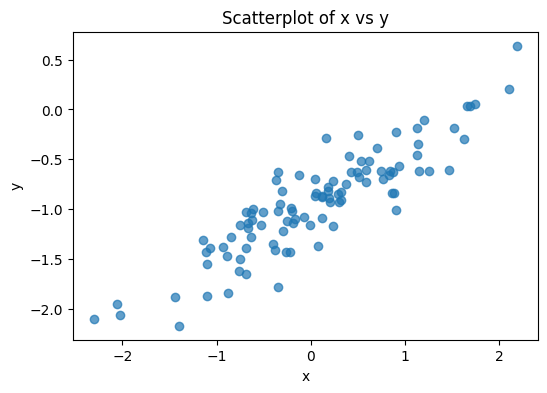

In [28]:
plt.figure(figsize=(6,4))
plt.scatter(x, y, alpha=0.7)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatterplot of x vs y")
plt.show()

e.	Fit a least squares linear model to predict “y” using “x”. Comment on the model obtained. How do β^0 and β^1 compare to β0 and β1 ?

In [29]:
df = pd.DataFrame({'x': x, 'y': y})
model = sm.ols('y ~ x', data=df).fit()
print(model.summary())

beta_hat0, beta_hat1 = model.params
print("Estimated beta0:", beta_hat0)
print("Estimated beta1:", beta_hat1)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Sun, 17 Aug 2025   Prob (F-statistic):           5.39e-36
Time:                        20:50:50   Log-Likelihood:                 4.1908
No. Observations:                 100   AIC:                            -4.382
Df Residuals:                      98   BIC:                            0.8288
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9632      0.023    -40.999      0.0

f.	Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a different color. Use the legend() function to create an appropriate legend

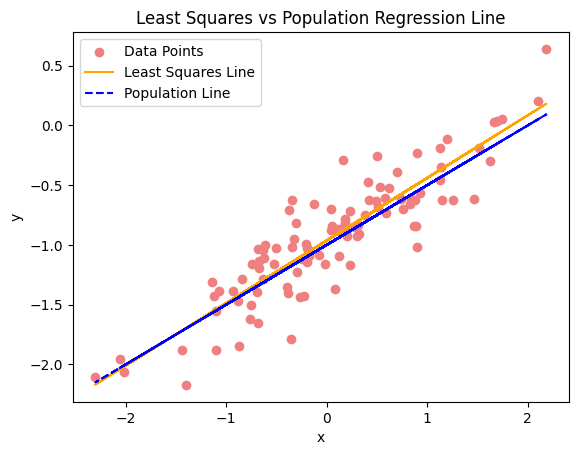

In [30]:
plt.scatter(x, y, color="lightcoral", label="Data Points")
plt.plot(df['x'], model.predict(df), color="orange", label="Least Squares Line")
plt.plot(df['x'], -1 + 0.5 * df['x'], color="blue", linestyle="--", label="Population Line")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Least Squares vs Population Regression Line")
plt.show()

2.  This problem involves the “Boston” data set, which we saw in the lab for this chapter. We will now try to predict per capita crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors.

a.	For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response ? Create some plots to back up your assertions.


In [31]:
Boston = load_data('Boston')
print(Boston)

y = Boston['crim']
X_all = Boston.drop(columns=['crim'])

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio  lstat  medv  
0       15.3   4.98  24.0  
1       17.8   9.14  21.6  
2       17.8   4.03  34.7  
3       18.

zn: p-value = 0.0000
indus: p-value = 0.0000
chas: p-value = 0.2094
nox: p-value = 0.0000
rm: p-value = 0.0000
age: p-value = 0.0000
dis: p-value = 0.0000
rad: p-value = 0.0000
tax: p-value = 0.0000
ptratio: p-value = 0.0000
lstat: p-value = 0.0000
medv: p-value = 0.0000

Significant predictors (p<0.05): ['zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat', 'medv']


C:\Users\emilj\AppData\Local\Temp\ipykernel_33204\1513608128.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = model.pvalues[1]  # p-value for predictor
C:\Users\emilj\AppData\Local\Temp\ipykernel_33204\1513608128.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = model.pvalues[1]  # p-value for predictor
C:\Users\emilj\AppData\Local\Temp\ipykernel_33204\1513608128.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[p

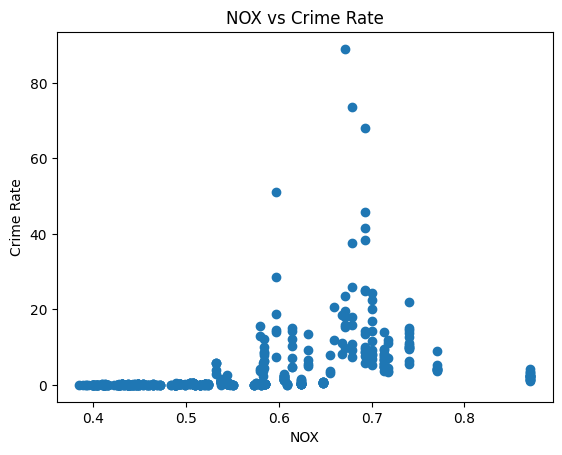

In [32]:
import statsmodels.api as sm
significant_predictors = []
for col in X_all.columns:
    X = sm.add_constant(Boston[col])
    model = sm.OLS(y, X).fit()
    p_value = model.pvalues[1]  # p-value for predictor
    print(f"{col}: p-value = {p_value:.4f}")
    if p_value < 0.05:
        significant_predictors.append(col)
        
print("\nSignificant predictors (p<0.05):", significant_predictors)


plt.scatter(Boston['nox'], y)
plt.xlabel('NOX')
plt.ylabel('Crime Rate')
plt.title('NOX vs Crime Rate')
plt.show()


b.	Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0:βj=0 ?

In [34]:
X_all_const = sm.add_constant(X_all)
multi_model = sm.OLS(y, X_all_const).fit()
print(multi_model.summary())

# Predictors where we can reject H0: βj = 0
reject_null = multi_model.pvalues[multi_model.pvalues < 0.05].index.tolist()
if 'const' in reject_null:
    reject_null.remove('const')
print("\nPredictors with significant effect in multiple regression:", reject_null)

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     33.52
Date:                Sun, 17 Aug 2025   Prob (F-statistic):           2.03e-56
Time:                        20:51:06   Log-Likelihood:                -1655.4
No. Observations:                 506   AIC:                             3337.
Df Residuals:                     493   BIC:                             3392.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.7784      7.082      1.946      0.0